In [109]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import ml_metrics as metrics

# Load datasets

In [137]:
train = pd.read_csv("./train.csv")

In [113]:
train.shape

(37670293, 24)

In [114]:
train.head(5)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [116]:
test = pd.read_csv("./test.csv")

In [117]:
test.shape

(2528243, 22)

In [118]:
test.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


In [115]:
train["hotel_cluster"].value_counts()

91    1043720
41     772743
48     754033
64     704734
65     670960
5      620194
98     589178
59     570291
42     551605
21     550092
70     545572
18     545284
83     534132
46     534038
25     530591
62     518809
95     509266
28     507016
68     503797
82     503755
37     496061
50     489892
30     489287
9      488328
58     483253
97     479446
16     477868
72     457463
1      452694
99     444887
       ...   
19     282893
84     278264
66     273505
38     269246
87     260398
23     259233
12     259022
31     257587
67     255946
43     253578
7      252447
54     250745
92     244343
89     243560
45     241408
49     240124
3      225250
80     220218
60     217919
71     216054
93     214293
86     209054
14     192299
75     165226
24     164127
35     139122
53     134812
88     107784
27     105040
74      48355
Name: hotel_cluster, dtype: int64

In [119]:
# They are the same users in both train and test datasets
test_ids = set(test.user_id.unique())
train_ids = set(train.user_id.unique())
intersection_count = len(test_ids & train_ids)
intersection_count == len(test_ids)

True

In [136]:
# load destination
destination = pd.read_csv("./destinations.csv")

In [138]:
destination.shape

(62106, 150)

In [139]:
destination.head()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


# Sampling

In [123]:
?random.sample

In [125]:
import random
# sample by unique id
unique_users = train.user_id.unique()
sel_user_ids = [unique_users[i] for i in sorted(random.sample(range(len(unique_users)), 10000)) ]
sel_train = train[train.user_id.isin(sel_user_ids)]

In [126]:
# add year and month for each row
sel_train["date_time"] = pd.to_datetime(sel_train["date_time"])
sel_train["year"] = sel_train["date_time"].dt.year
sel_train["month"] = sel_train["date_time"].dt.month

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [128]:
# choose rows after July, 2014
t1 = sel_train[((sel_train.year == 2013) | ((sel_train.year == 2014) & (sel_train.month < 8)))]
t2 = sel_train[((sel_train.year == 2014) & (sel_train.month >= 8))]

In [129]:
# remove click events
t2 = t2[t2.is_booking == True]

In [130]:
# most frequent clusters
most_common_clusters = list(train.hotel_cluster.value_counts().head().index)

In [131]:
# apply most frequent clusters as the predictions
predictions = [most_common_clusters for i in range(t2.shape[0])]

In [132]:
# evaluate the performance
target = [[l] for l in t2["hotel_cluster"]]
metrics.mapk(target, predictions, k=5)

0.06268745739604635

In [133]:
# find correlation in training data
train.corr()["hotel_cluster"]

site_name                   -0.022408
posa_continent               0.014938
user_location_country       -0.010477
user_location_region         0.007453
user_location_city           0.000831
orig_destination_distance    0.007260
user_id                      0.001052
is_mobile                    0.008412
is_package                   0.038733
channel                      0.000707
srch_adults_cnt              0.012309
srch_children_cnt            0.016261
srch_rm_cnt                 -0.005954
srch_destination_id         -0.011712
srch_destination_type_id    -0.032850
is_booking                  -0.021548
cnt                          0.002944
hotel_continent             -0.013963
hotel_country               -0.024289
hotel_market                 0.034205
hotel_cluster                1.000000
Name: hotel_cluster, dtype: float64

In [134]:
# no columns correlate linearly with hotel_cluster. This makes sense, because there is no linear ordering to hotel_cluster. 
# this means that techniques like linear regression and logistic regression won’t work well on our data, 
# because they rely on linear correlations between predictors and targets.

In [147]:
# include the destination description
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
dest_desc = pca.fit_transform(destination[["d{0}".format(i) for i in range(1, 150)]])
dest_desc = pd.DataFrame(dest_desc)
dest_desc["srch_destination_id"] = destination["srch_destination_id"]

In [148]:
dest_desc.shape

(62106, 4)

In [149]:
dest_desc.head()

,0,1,2,srch_destination_id
0,0.044268,-0.169419,-0.032522,0
1,0.440761,-0.077405,0.091572,1
2,-0.001033,-0.020677,-0.012108,2
3,0.480467,0.040345,0.019320,3
4,0.207253,0.042694,0.011744,4


# Feature Engineering

In [110]:
# Features not chosen(6 features):
# site_name : ID of the Expedia point of sale (i.e. Expedia.com, Expedia.co.uk, Expedia.co.jp, ...) : int
# posa_continent : ID of continent associated with site_name : int
# user_id : ID of users : int
# is_mobile: 1 when a user connected from a mobile device, 0 otherwise : tinyint
# is_package : 1 if the click/booking was generated as a part of a package (i.e. combined with a flight), 0 otherwise : int
# cnt : Numer of similar events in the context of the same user session : bigint

In [111]:
# 18 features
dtype_train ={
            #'user_location_country' : np.str_, # The ID of the country the customer is located
            #'user_location_region' : np.str_, # The ID of the region the customer is located
            #'user_location_city' : np.str_, # The ID of the city the customer is located
            'orig_destination_distance':np.float64, # Physical distance between a hotel and a customer at the time of search. A null means the distance could not be calculated
            'channel' : np.str_, #	ID of a marketing channel
            'srch_ci' : np.str_, # Checkin date
            'srch_co' : np.str_, # Checkout date
            'srch_adults_cnt' : np.int32, # The number of adults specified in the hotel room
            'srch_children_cnt' : np.int32, # The number of (extra occupancy) children specified in the hotel room
            'srch_rm_cnt' : np.int32, # The number of hotel rooms specified in the search
            'srch_destination_id' : np.str_, # ID of the destination where the hotel search was performed
            'srch_destination_type_id' : np.str_, # Type of destination
            'hotel_continent' : np.str_, # Hotel continent
            'hotel_country' : np.str_, # Hotel country
            'hotel_market' : np.str_, # Hotel market
            'is_booking': bool, # 1 if a booking, 0 if a click
            'hotel_cluster' : np.str_,
            'date_time': np.str_, # ID of a hotel cluster
            }

In [9]:
def prepare_data_before_modeling(df):
    # add new predictors of plan_time and hotel_nights
    df['srch_ci'] = pd.to_datetime(df['srch_ci'], infer_datetime_format = True, errors='coerce')
    df['srch_co'] = pd.to_datetime(df['srch_co'], infer_datetime_format = True, errors='coerce')
    df['plan_time'] = ((df['srch_ci'] - df['date_time']) / np.timedelta64(1,'D')).astype(float)
    df['hotel_nights']=((df['srch_co'] - df['srch_ci']) / np.timedelta64(1,'D')).astype(float)
    # fill in the NAs
    distance_mean = df.orig_destination_distance.mean()
    df['orig_destination_distance'] = df.orig_destination_distance.fillna(distance_mean)
    # drop some unused columns
    drop_columns = ['date_time', 'srch_ci', 'srch_co']
    df.drop(drop_columns, axis=1, inplace = True)
    df.fillna(-1,inplace=True)
    return df

In [10]:
train = prepare_data_before_modeling(train)
train.shape

(107553, 13)

In [11]:
train.columns

Index([u'orig_destination_distance', u'channel', u'srch_adults_cnt',
       u'srch_children_cnt', u'srch_rm_cnt', u'srch_destination_id',
       u'srch_destination_type_id', u'hotel_continent', u'hotel_country',
       u'hotel_market', u'hotel_cluster', u'plan_time', u'hotel_nights'],
      dtype='object')

In [12]:
train.head()

,orig_destination_distance,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market,hotel_cluster,plan_time,hotel_nights
1,2234.264100,9,2,0,1,8250,1,2,50,628,1,17.651250,4.0
20,1714.756917,4,2,0,1,8291,1,2,50,191,2,49.248935,2.0
72,1714.756917,9,2,0,1,8803,1,3,151,69,36,214.248380,2.0
79,2454.858800,1,3,0,2,12009,1,2,50,680,95,49.312303,5.0
81,2454.858800,1,2,0,1,12009,1,2,50,680,95,49.302130,5.0


# Data exploring

In [14]:
?RandomForestClassifier()

# Modeling

In [16]:
# split the train into train and validation sets
train_predictors, vali_predictors, train_labels, vali_labels = train_test_split(train.drop('hotel_cluster', axis = 1), train['hotel_cluster'], test_size = 0.3)

In [17]:
print train_predictors.shape, train_labels.shape, vali_predictors.shape, vali_labels.shape

(75287, 12) (75287,) (32266, 12) (32266,)


In [18]:
# apply random forest to train the model
rf_tree = RandomForestClassifier(n_estimators = 100, max_depth = 20, random_state = 123, n_jobs = -1)
rf_tree.fit(train_predictors, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [19]:
# show the importance of each feature
importance = rf_tree.feature_importances_
importance

array([ 0.15796562,  0.08580455,  0.06036846,  0.03824142,  0.02500667,
        0.13296236,  0.03166794,  0.0151729 ,  0.03741034,  0.12188267,
        0.20957067,  0.08394641])

In [20]:
np.argsort(importance)

array([ 7,  4,  6,  8,  3,  2, 11,  1,  9,  5,  0, 10])

In [21]:
indices=np.argsort(importance)[::-1][:10]

In [22]:
importance[indices]

array([ 0.20957067,  0.15796562,  0.13296236,  0.12188267,  0.08580455,
        0.08394641,  0.06036846,  0.03824142,  0.03741034,  0.03166794])

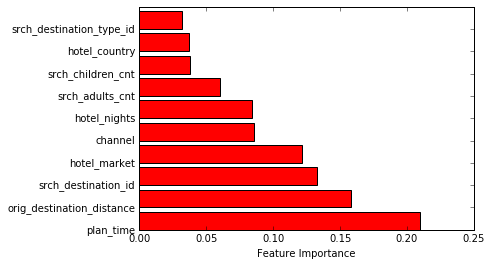

In [23]:
plt.barh(range(10), importance[indices],color='r')
plt.yticks(range(10), train_predictors.columns[indices])
plt.xlabel('Feature Importance')
plt.show()

In [24]:
# show the clusters
rf_tree.classes_

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98',
       '99'], dtype=object)

In [25]:
# function to return 5 prediction clusters
def predict_clusters(model, predictors):
    # save the cluster index in the model for later ranking
    dict_clusters = {}
    for (k,v) in enumerate(model.classes_):
        dict_clusters[k] = v
    
    # validate the modeling
    vali_predictions = model.predict_proba(predictors)
    # take largest 5 probablities' index
    clusters_index = vali_predictions.argsort(axis=1)[:, -5:]
    
    # get cluster name by 5 index
    clusters = []
    for index in clusters_index.flatten():
        clusters.append(dict_clusters.get(index))
    
    # get the cluster predictions
    cluster_predictions = np.array(clusters).reshape(clusters_index.shape)
    
    return cluster_predictions

In [26]:
cluster_predictions = predict_clusters(rf_tree, vali_predictors)
cluster_predictions

array([['62', '46', '82', '78', '29'],
       ['13', '28', '95', '2', '16'],
       ['77', '42', '72', '48', '91'],
       ..., 
       ['16', '60', '5', '46', '58'],
       ['77', '48', '50', '91', '42'],
       ['49', '48', '21', '98', '68']], 
      dtype='|S2')

In [27]:
# calculate the scores
print("score:", metrics.mapk(vali_labels, cluster_predictions, k=5))

('score:', 0.10903221140932662)


In [28]:
rf_tree2 = RandomForestClassifier(n_estimators = 20, max_depth = 10, random_state = 123, n_jobs = -1)
rf_tree2.fit(train_predictors, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [29]:
cluster_predictions2 = predict_clusters(rf_tree2, train_predictors)
print("score:", metrics.mapk(train_labels, cluster_predictions2, k=5))

('score:', 0.11564059310815059)


In [30]:
cluster_predictions2 = predict_clusters(rf_tree2, vali_predictors)
print("score:", metrics.mapk(vali_labels, cluster_predictions2, k=5))

('score:', 0.09685504865803013)


# Test Modeling

In [31]:
dtype_test = {
            #'user_location_country' : np.str_, # The ID of the country the customer is located
            #'user_location_region' : np.str_, # The ID of the region the customer is located
            #'user_location_city' : np.str_, # The ID of the city the customer is located
            'orig_destination_distance':np.float64, # Physical distance between a hotel and a customer at the time of search. A null means the distance could not be calculated
            'channel' : np.str_, #	ID of a marketing channel
            'srch_ci' : np.str_, # Checkin date
            'srch_co' : np.str_, # Checkout date
            'srch_adults_cnt' : np.int32, # The number of adults specified in the hotel room
            'srch_children_cnt' : np.int32, # The number of (extra occupancy) children specified in the hotel room
            'srch_rm_cnt' : np.int32, # The number of hotel rooms specified in the search
            'srch_destination_id' : np.str_, # ID of the destination where the hotel search was performed
            'srch_destination_type_id' : np.str_, # Type of destination
            'hotel_continent' : np.str_, # Hotel continent
            'hotel_country' : np.str_, # Hotel country
            'hotel_market' : np.str_, # Hotel market
            'date_time': np.str_, # ID of a hotel cluster
            }

In [32]:
# load test data
test = pd.read_csv('test.csv', dtype = dtype_test, usecols = dtype_test, parse_dates = ['date_time'], sep = ',')

In [33]:
# feature cleaning
test = prepare_data_before_modeling(test)
test.shape

(2528243, 12)

In [34]:
test.iloc[:1000000, :].shape

(1000000, 12)

In [35]:
test.isnull().sum(axis = 0)

orig_destination_distance    0
channel                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
hotel_continent              0
hotel_country                0
hotel_market                 0
plan_time                    0
hotel_nights                 0
dtype: int64

In [52]:
subset0 = predict_clusters(rf_tree, test.iloc[0:500000, :])
len(subset0)

500000

In [53]:
subset1 = predict_clusters(rf_tree, test.iloc[500000:1000000, :])
len(subset1)

In [55]:
subset2 = predict_clusters(rf_tree, test.iloc[1000000:1500000, :])
len(subset2)

500000

In [57]:
subset3 = predict_clusters(rf_tree, test.iloc[1500000:2000000, :])
len(subset3)

500000

In [58]:
subset4 = predict_clusters(rf_tree, test.iloc[2000000:, :])
len(subset4)

528243

In [69]:
predictions_test = pd.DataFrame()

In [70]:
predictions_test = predictions_test.append(pd.DataFrame(subset0))
len(predictions_test)

500000

In [71]:
predictions_test = predictions_test.append(pd.DataFrame(subset1))
len(predictions_test)

1000000

In [72]:
predictions_test = predictions_test.append(pd.DataFrame(subset2))
len(predictions_test)

1500000

In [73]:
predictions_test = predictions_test.append(pd.DataFrame(subset3))
len(predictions_test)

2000000

In [74]:
predictions_test = predictions_test.append(pd.DataFrame(subset4))
len(predictions_test)

2528243

In [75]:
predictions_test.shape

(2528243, 5)

# Output test results

In [93]:
predictions_test = predictions_test.as_matrix()

In [94]:
type(predictions_test)

numpy.ndarray

In [96]:
predictions_output = map(lambda x: ' '.join(map(str,x)), predictions_test)

AttributeError: 'list' object has no attribute 'shape'

In [99]:
predictions_output[0:10]

['64 5 41 48 37',
 '11 67 82 62 58',
 '77 13 28 50 91',
 '54 45 79 24 1',
 '5 72 91 48 6',
 '91 28 39 42 48',
 '42 95 2 21 98',
 '98 50 68 95 59',
 '79 19 24 1 88',
 '50 32 72 96 55']

In [100]:
# load test data
submission = pd.read_csv('sample_submission.csv', sep = ',')

In [101]:
submission.head()

,id,hotel_cluster
0,0,99 1
1,1,99 1
2,2,99 1
3,3,99 1
4,4,99 1


In [102]:
len(submission)

2528243

In [103]:
submission['hotel_cluster'] = predictions_output

In [104]:
submission[['id', 'hotel_cluster']].to_csv('out.csv', index = False)

In [105]:
submission.head()

,id,hotel_cluster
0,0,64 5 41 48 37
1,1,11 67 82 62 58
2,2,77 13 28 50 91
3,3,54 45 79 24 1
4,4,5 72 91 48 6
